In [20]:
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
from gseapy import barplot, dotplot

In [26]:
sc.settings.set_figure_params(
    dpi=80,
    frameon=False,  
)
plt.rcParams['axes.grid'] = False

In [2]:
adata = sc.read_h5ad('integrated.h5ad')

c:\Users\19utk\anaconda3\envs\ds\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
de = sc.get.rank_genes_groups_df(adata, group=None, key='dea_by_sample')
de

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,donor1,HBB,106.147530,5.586857,0.0,0.0
1,donor1,HBA2,76.668602,4.800794,0.0,0.0
2,donor1,IGKC,67.459335,3.495630,0.0,0.0
3,donor1,IFITM3,67.213654,2.148231,0.0,0.0
4,donor1,HLA-DRB5,65.972931,6.262540,0.0,0.0
...,...,...,...,...,...,...
59869,donor3,FKBP2,-51.226288,-3.957386,0.0,0.0
59870,donor3,PTP4A1,-55.360779,-10.723681,0.0,0.0
59871,donor3,SCGB3A1,-63.226078,-2.148722,0.0,0.0
59872,donor3,SCGB1A1,-76.850922,-2.235101,0.0,0.0


In [38]:
sigs = de[(de.pvals_adj < 0.01) & (abs(de.logfoldchanges) > 2)]
sigs

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,donor1,HBB,106.147530,5.586857,0.0,0.0
1,donor1,HBA2,76.668602,4.800794,0.0,0.0
2,donor1,IGKC,67.459335,3.495630,0.0,0.0
3,donor1,IFITM3,67.213654,2.148231,0.0,0.0
4,donor1,HLA-DRB5,65.972931,6.262540,0.0,0.0
...,...,...,...,...,...,...
59869,donor3,FKBP2,-51.226288,-3.957386,0.0,0.0
59870,donor3,PTP4A1,-55.360779,-10.723681,0.0,0.0
59871,donor3,SCGB3A1,-63.226078,-2.148722,0.0,0.0
59872,donor3,SCGB1A1,-76.850922,-2.235101,0.0,0.0


In [39]:
gene_list = sigs['names'].tolist()

In [10]:
[term for term in gp.get_library_name() if term.startswith('GO') or term.startswith('KEGG')]

['GO_Biological_Process_2021',
 'GO_Biological_Process_2023',
 'GO_Biological_Process_2025',
 'GO_Cellular_Component_2021',
 'GO_Cellular_Component_2023',
 'GO_Cellular_Component_2025',
 'GO_Molecular_Function_2021',
 'GO_Molecular_Function_2023',
 'GO_Molecular_Function_2025',
 'KEGG_2013',
 'KEGG_2015',
 'KEGG_2016',
 'KEGG_2019_Human',
 'KEGG_2019_Mouse',
 'KEGG_2021_Human']

In [40]:
enr = gp.enrichr(gene_list= gene_list,
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2023'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = adata.var_names.tolist()
                )

In [41]:
enr.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Protein digestion and absorption,2.089460e-07,0.000061,0,0,4.718077,7.256963e+01,CPA3;COL28A1;COL15A1;COL13A1;COL14A1;ELN;ATP1B...
1,KEGG_2021_Human,ECM-receptor interaction,1.822294e-06,0.000265,0,0,4.189001,5.535939e+01,LAMA2;LAMA4;TNC;FN1;LAMC2;LAMB1;THBS2;COMP;COL...
2,KEGG_2021_Human,Malaria,2.745484e-04,0.026631,0,0,4.158066,3.409774e+01,COMP;SELP;KLRK1;TGFB3;HBB;HBA2;HBA1;ACKR1;THBS...
3,KEGG_2021_Human,ABC transporters,1.319573e-03,0.087500,0,0,3.946048,2.616406e+01,ABCA1;ABCD2;ABCA10;ABCB6;ABCA6;ABCA9;ABCA8;ABC...
4,KEGG_2021_Human,Dilated cardiomyopathy,1.503438e-03,0.087500,0,0,2.762255,1.795466e+01,RYR2;LAMA2;TGFB3;TPM2;ADCY2;IGF1;CACNG6;CACNB2...
...,...,...,...,...,...,...,...,...,...
3398,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,9.999930e-01,0.999996,0,0,0.554371,3.881277e-06,FANK1;TGFB1I1;TCF21;RORB;MEOX2;MEOX1;SHH;FGF7;...
3399,GO_Biological_Process_2023,Protein Modification By Small Protein Conjugat...,9.999945e-01,0.999996,0,0,0.208455,1.153493e-06,GAN;RNF39;FBXL2;KLHL13;PDZRN3
3400,GO_Biological_Process_2023,Chromatin Organization (GO:0006325),9.999951e-01,0.999996,0,0,0.116327,5.752291e-07,HMGN4;CHD1L
3401,GO_Biological_Process_2023,Ubiquitin-Dependent Protein Catabolic Process ...,9.999954e-01,0.999996,0,0,0.190274,8.821785e-07,TRIM71;PSMA6;C17ORF97;UBXN11;TGFB1I1


c:\Users\19utk\anaconda3\envs\ds\Lib\site-packages\gseapy\plot.py:753: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


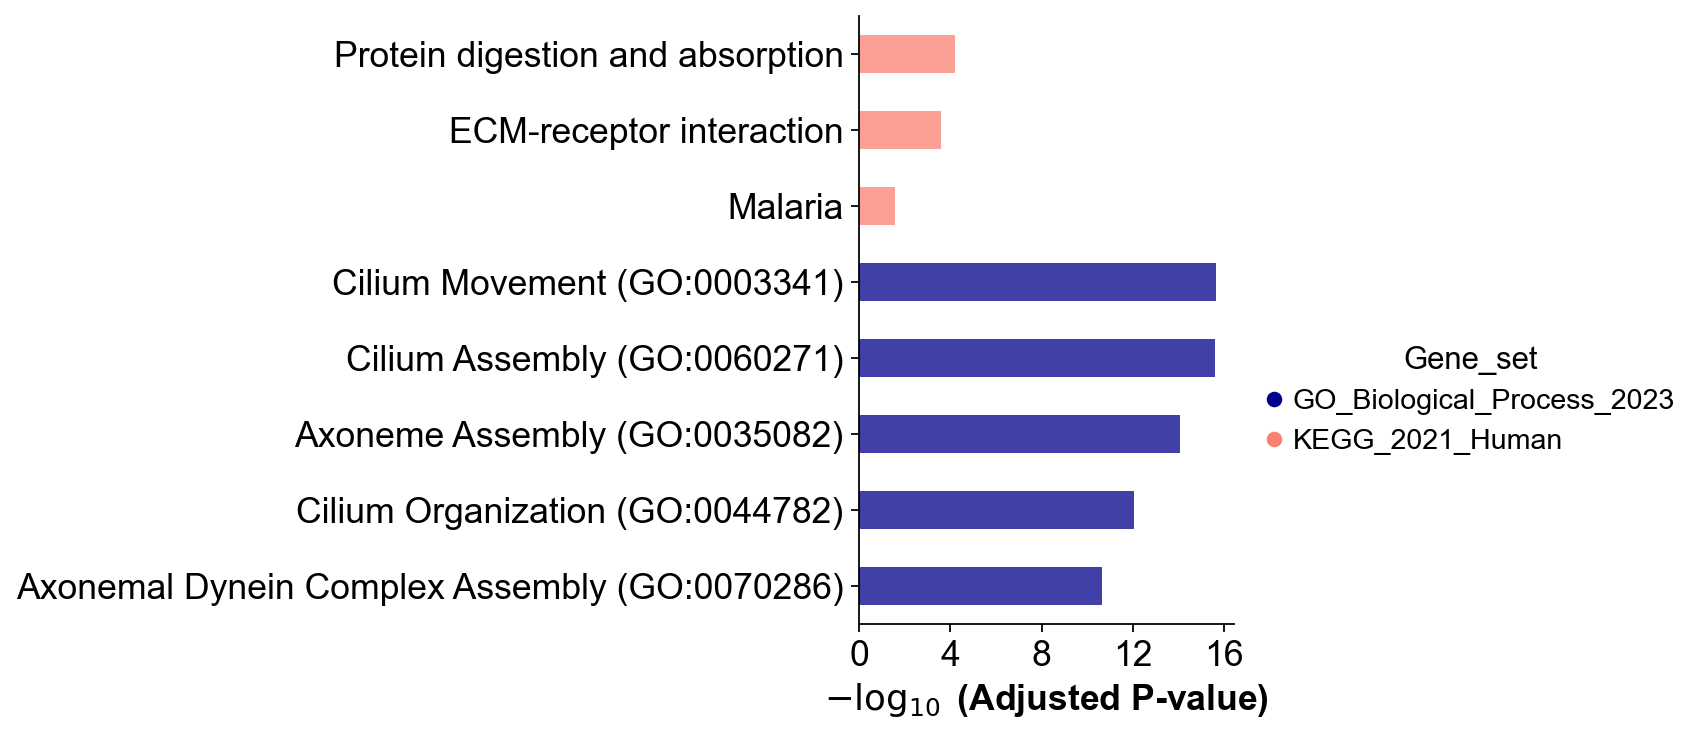

In [42]:
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', 
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] 
              color = {'KEGG_2021_Human': 'salmon', 'GO_Biological_Process_2023':'darkblue'}
             )